In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
print("Database and table created.")



Database and table created.


In [ ]:
Explanation

sqlite3.connect("sales_data.db") — opens the database file; if it doesn't exist it is created.

cursor() — gives you a cursor to run SQL commands.

CREATE TABLE IF NOT EXISTS — creates the sales table only if it’s not already there. Fields:

id — auto increment primary key.

product — product name (text).

quantity — number of units sold (integer).

price — unit price (real/float).

conn.commit() — saves the change to the file.

In [3]:
sample_data = [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 50000),
    ("Mouse", 10, 500),
    ("Keyboard", 5, 1200),
    ("Keyboard", 2, 1200),
    ("Monitor", 1, 15000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
print("Sample data inserted.")


Sample data inserted.


In [ ]:
Explanation

executemany() runs the INSERT for each tuple in sample_data.

Use ? placeholders to avoid SQL injection and for convenience.


In [4]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Keyboard,7,8400.0
1,Laptop,5,250000.0
2,Monitor,1,15000.0
3,Mouse,10,5000.0


In [ ]:
Explanation

pd.read_sql_query(query, conn) — runs the SQL query and returns a pandas DataFrame.

The SQL:

SUM(quantity) gives total units sold per product.

SUM(quantity * price) computes revenue per row then sums — so it gives total revenue per product.

GROUP BY product aggregates results by product name.

print(df) shows the DataFrame in the console/notebook. In Jupyter you can also just put df as last line to render nicely.

In [5]:
print(df)


    product  total_qty   revenue
0  Keyboard          7    8400.0
1    Laptop          5  250000.0
2   Monitor          1   15000.0
3     Mouse         10    5000.0


In [ ]:
This prints every row including id, product, quantity, price.

In [7]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>

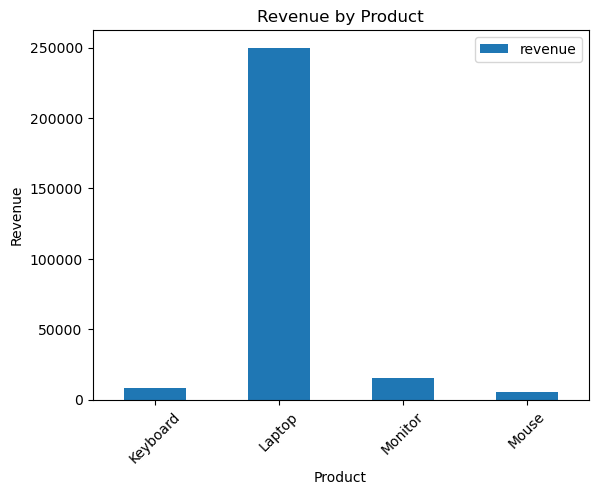

In [6]:
df.plot(kind='bar', x='product', y='revenue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=45)
plt.show()


In [ ]:
Explanation

df.plot(kind='bar', x='product', y='revenue') is a quick way to plot a DataFrame column.

plt.tight_layout() helps with spacing so labels don't get cut off.

plt.show() displays the chart (in notebooks it renders inline).

In [8]:
conn.close()


In [ ]:
Explanation:
Frees the file handle. Always good practice.